In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report


**1. Load the dataset**

In [2]:
park = pd.read_csv('parkinsons.data')

**Attribute Information:**

Matrix column entries (attributes):
1. name - ASCII subject name and recording number
2. MDVP:Fo(Hz) - Average vocal fundamental frequency
3. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
4. MDVP:Flo(Hz) - Minimum vocal fundamental frequency
5. MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
7. MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
8. NHR,HNR - Two measures of ratio of noise to tonal components in the voice
9. status - Health status of the subject (one) - Parkinson's, (zero) - healthy
10. RPDE,D2 - Two nonlinear dynamical complexity measures
11. DFA - Signal fractal scaling exponent
12. spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

**2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset**

In [4]:
park.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
park.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [6]:
park.shape

(195, 24)

In [8]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

#### Check for NULL:

In [28]:
park.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [3]:
#changing the column names for the easy readability.

park_df = park.copy()
park_df.columns = ['name','Fo','Fhi','Flo','Jitter(%)','Jitter(Abs)','RAP','PPQ','DDP','Shimmer','Shimmer(dB)','APQ3','APQ5','APQ','DDA','NHR','HNR','status','RPDE','DFA','spread1','spread2','D2','PPE']


In [4]:
# Reordering target(dependent variable) to the end.

park_df = park_df[['name','Fo','Fhi','Flo','Jitter(%)','Jitter(Abs)','RAP','PPQ','DDP','Shimmer','Shimmer(dB)','APQ3','APQ5','APQ','DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE','status']]

In [31]:
park_df.head()

,name,Fo,Fhi,Flo,Jitter(%),Jitter(Abs),RAP,PPQ,DDP,Shimmer,...,DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [5]:
### Removing name attribute as it just an unique identifier and is not useful for analysis
park_df.drop('name',1, inplace=True)

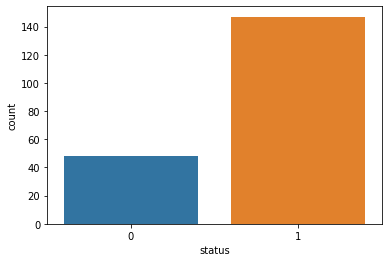

In [52]:
sns.countplot(park_df.status)

We can see that people with PD(status = 1) is almost thrice that of people without PD(status = 0)
This is a class imbalance and may lead to biase errors
We can correct this using SMOTE

In [ ]:
#Using SMOTE to fix class imbalance
from collections import Counter
from imblearn.over_sampling import SMOTE

In [53]:
X=park_df.iloc[:,:-1]
y=park_df.iloc[:,-1]

In [54]:
Counter(y)

Counter({1: 147, 0: 48})

In [55]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

After applying SMOTE: 

In [56]:
Counter(y)

Counter({1: 147, 0: 147})

In [57]:
park_df = pd.concat([X,y],axis=1)

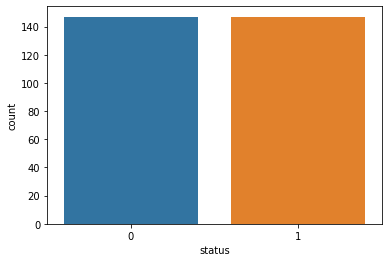

In [58]:
sns.countplot(park_df.status)

In [60]:
park_df.shape

(294, 23)

**3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?**

In [59]:
park_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fo,294.0,163.355259,45.797782,88.333000,120.078500,153.864000,201.206469,260.105000
Fhi,294.0,203.266587,87.615221,102.145000,135.236250,199.545500,239.402500,592.030000
Flo,294.0,125.731494,49.976999,65.476000,89.537500,107.743670,150.989500,239.170000
Jitter(%),294.0,0.005485,0.004240,0.001680,0.003096,0.004387,0.006088,0.033160
Jitter(Abs),294.0,0.000037,0.000031,0.000007,0.000020,0.000030,0.000049,0.000260
RAP,294.0,0.002861,0.002567,0.000680,0.001520,0.002050,0.003359,0.021440
PPQ,294.0,0.002995,0.002390,0.000920,0.001679,0.002220,0.003367,0.019580
DDP,294.0,0.008583,0.007700,0.002040,0.004562,0.006160,0.010075,0.064330
Shimmer,294.0,0.025669,0.016575,0.009540,0.015822,0.019575,0.028557,0.119080
Shimmer(dB),294.0,0.242182,0.170521,0.085000,0.142250,0.180911,0.266750,1.302000


Observation:

The following attribiutes are  right skewed as the central value(mean) is shifted to right of median. 'Fo','Fhi','Flo','Jitter(%)','RAP','PPQ','DDP','Shimmer','Shimmer(dB)','APQ3','APQ5','APQ','DDA','NHR'

The following attribiutes are  left skewed as the central value(mean) is shifted to left of median. 'HNR','spread1','spread2','D2','PPE'

The following atributes are almost normally distributed as the mean and median have approx same values. 'Jitter(Abs)','RPDE','DFA'

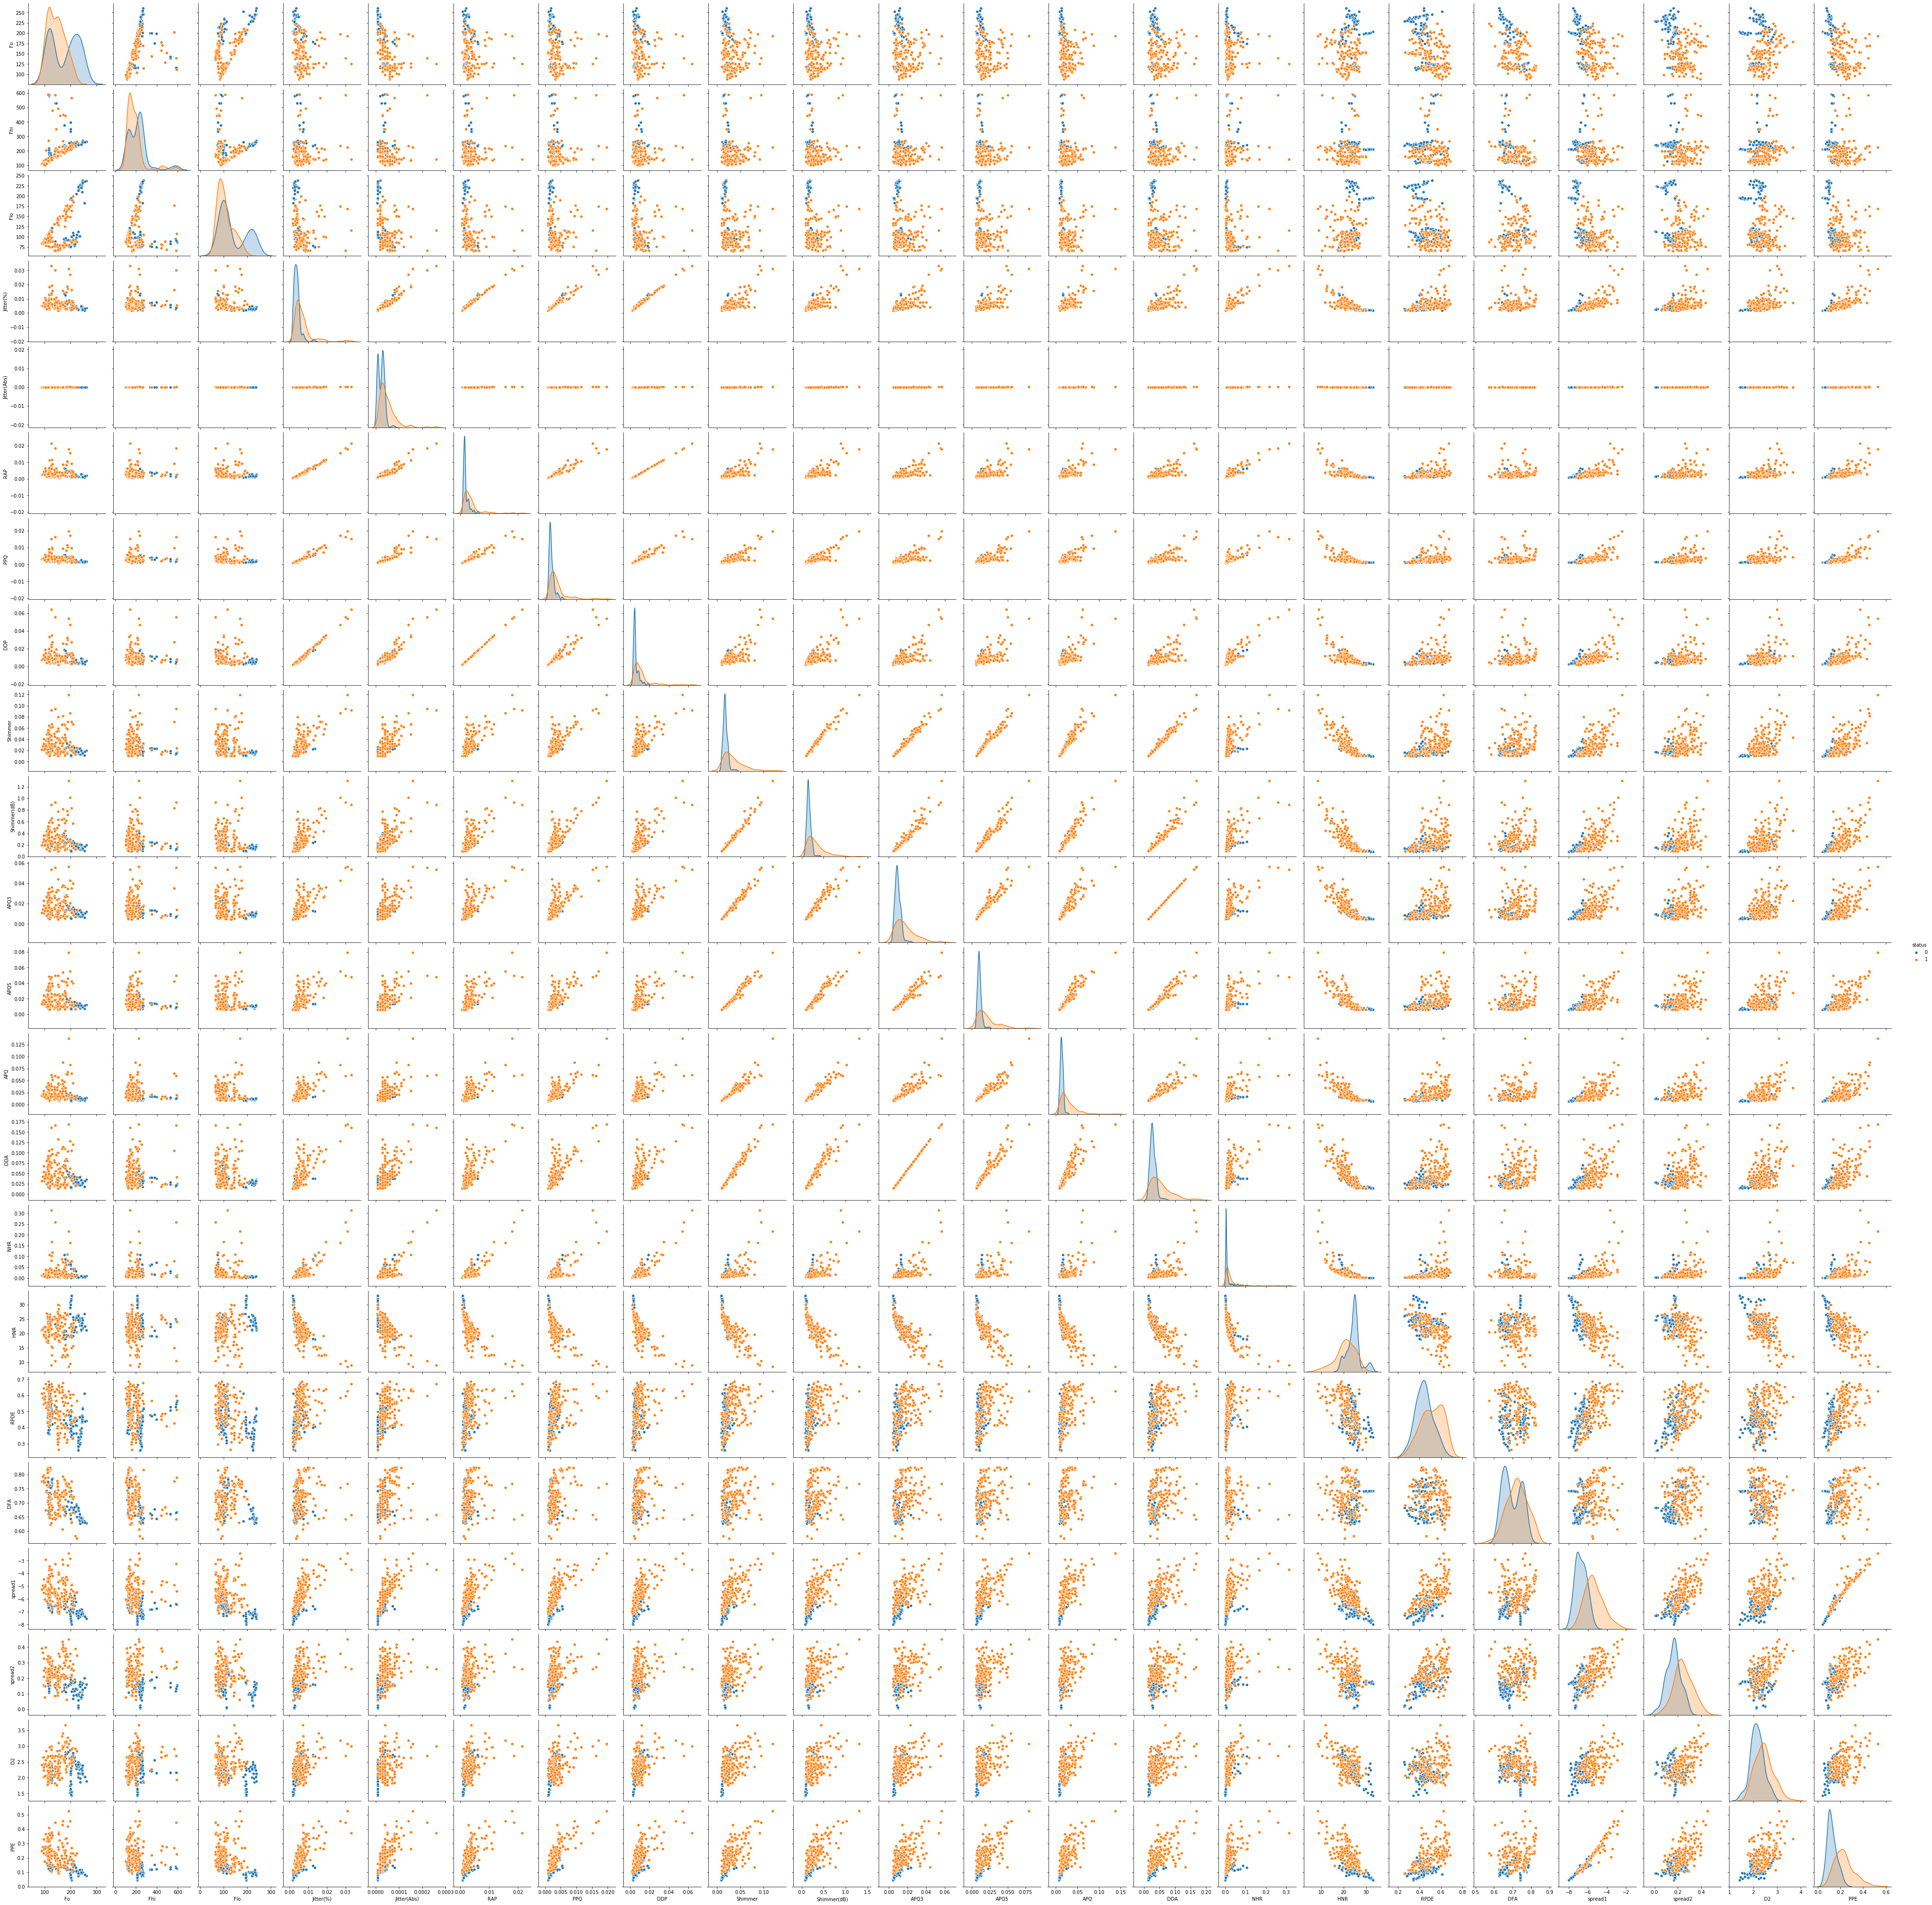

In [51]:
sns.pairplot(park_df,diag_kind='kde',hue='status')

Observation: 

1. The pairplot above shows variation for both healthy (Blue) and people with PD (Orange). 
2. There seems to postive relation among several independant variables. The exact strength can be identified using pearson correlation coeff
3. The attribute HNR gererally seems to have a negative relation with most of the attributes
4. There are clear multimodal distribution in Vocal fundamental frequencies - Fo, Fhi and Fio
5. The spread of attributes for people with PD is generally wider comapred to healthy people. For healthy people the spread is generally narrower. The measures to find variation in fundamental frequency and variation in amplitude as good examples for this.  
6. We also notice that there is no distinct speration of distribution of the classes in most of the attributes. They often tend to overlap. 



In [63]:
park_df.groupby(park_df['status']).mean().T

status,0,1
Fo,181.529756,145.180762
Fhi,218.091711,188.441463
Flo,144.569430,106.893558
Jitter(%),0.003980,0.006989
Jitter(Abs),0.000024,0.000051
RAP,0.001964,0.003757
PPQ,0.002089,0.003900
DDP,0.005893,0.011273
Shimmer,0.017680,0.033658
Shimmer(dB),0.163159,0.321204


Observation:
    
1. Vocal fundamental frequency - Fo, Fhi and Fio are higher in healthy people compared to people with PD.
2. The nonlinear measures of fundamental frequency variation - spread1,spread2,PPE are higher in people with PD compared to healthy people
3. The nonlinear dynamical complexity measures - D2 and RPDE are higher in people with PD.
4. The measures to find variation in fundamental frequency - Jitter(%),Jitter(Abs), RAP, PPQ and DDP generally seems to be higher for people with PD.
5. The measures to find variation in amplitude - Shimmer,Shimmer(dB),APQ3,APQ5,APQ,DDA generally seems to be higher for people with PD.


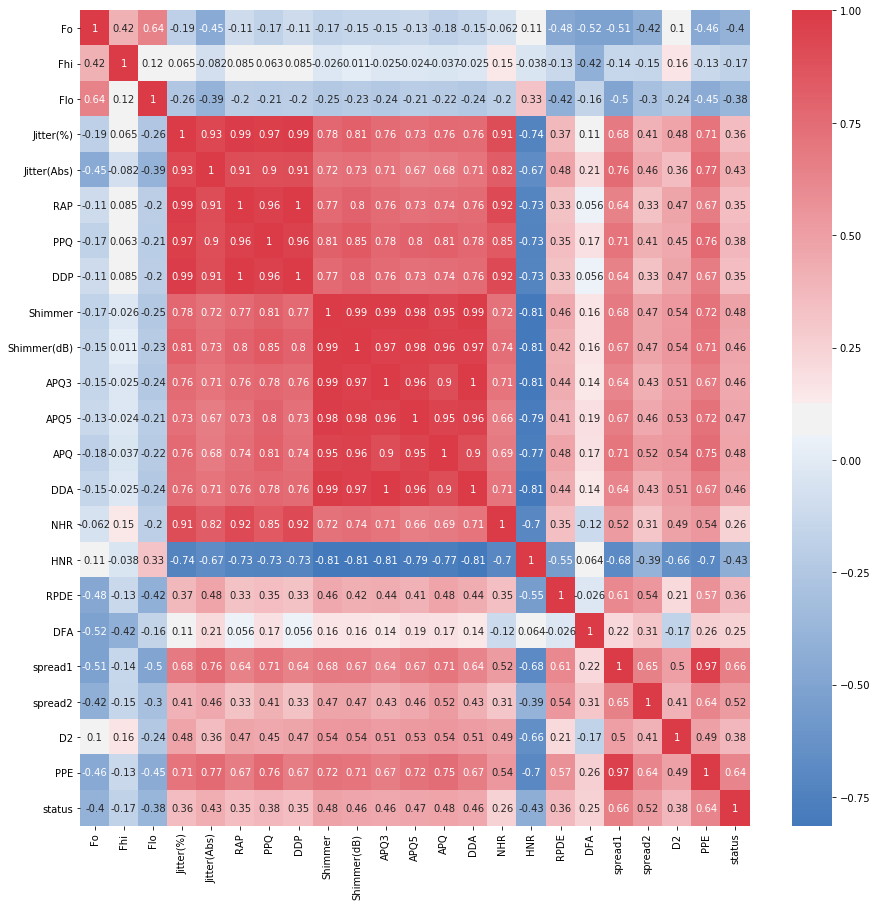

In [82]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(park_df.corr(), cmap = cmap, annot = True);

Observation:

1. There is very high multicollinearity among Jitter(%), RAP, PPQ and DDP. These are several measures to find variation in fundamental frequency. We may have to keep one of them and drop the others
2. There is very high multicollinearity among Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude. We may have to keep one of them and drop the others
3. There is good negaive correlation between HNR and measures to find variation in fundamental frequency and variation in amplitude.

In [84]:
# Checking feature Importance:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
X=park_df.iloc[:,:-1]
y=park_df.iloc[:,-1]
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
a = np.array(X.columns)

In [93]:
b = rf.feature_importances_

In [103]:
varImp = pd.DataFrame(zip(a, b), columns=['Attr','Imp'] )

In [105]:
varImp.sort_values(by=['Imp'], ascending=False)

,Attr,Imp
18,spread1,0.133851
21,PPE,0.123904
19,spread2,0.080831
12,APQ,0.076213
0,Fo,0.066718
8,Shimmer,0.060547
11,APQ5,0.052356
20,D2,0.037351
13,DDA,0.037286
1,Fhi,0.036148


**4. Split the data set into training and test set in the ratio of 70:30 (Training:Test)**

In [148]:
#Dropping multicollinear columns
X = park_df.drop(['Jitter(%)','RAP','PPQ','Shimmer(dB)','APQ3','APQ5','status'],axis=1)
y = park_df['status']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

**5. Create the model using “entropy” method of reducing the entropy and fit it to training data**

In [150]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy')

In [151]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**6. Test the model on test data and what is the accuracy achieved. Capture the predictedvalues and do a crosstab**

In [152]:
#Calculating accuracy on test data
model_entropy.score(X_test, y_test)

0.9101123595505618

In [156]:
y_pred = model_entropy.predict(X_test)

In [157]:
pd.crosstab(y_test, y_pred)

col_0,0,1
status,,
0,46,5
1,3,35


In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.88      0.92      0.90        38

    accuracy                           0.91        89
   macro avg       0.91      0.91      0.91        89
weighted avg       0.91      0.91      0.91        89



From the base model, the accuracy score is **0.91** on the test data

**7.Use regularization parameters of max_depth, min_sample_leaf to recreate the model.What is the impact on the model accuracy? How does regularization help?**

Score for max_depth=1 : 0.8314606741573034
Score for max_depth=2 : 0.7528089887640449
Score for max_depth=3 : 0.898876404494382
Score for max_depth=4 : 0.9325842696629213
Score for max_depth=5 : 0.9101123595505618
Score for max_depth=6 : 0.9325842696629213
Score for max_depth=7 : 0.9101123595505618
Score for max_depth=8 : 0.9213483146067416
Score for max_depth=9 : 0.9101123595505618


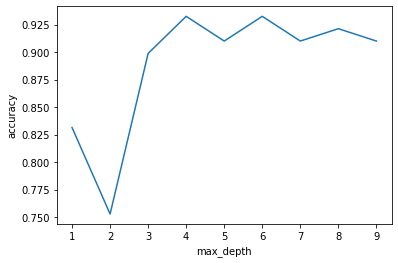

In [134]:
score_list = []  # we store the values we find in this list.
for each in range(1,10):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth= each)
    dt.fit(X_train,y_train)
    score_list.append(dt.score(X_test,y_test))
    print(f"Score for max_depth={each} : {dt.score(X_test,y_test)}")
    
# visualize
plt.plot(range(1,10),score_list)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.show()

The accuracy is highest at max_depth = 4

Score for min_samples_leaf=1 : 0.9325842696629213
Score for min_samples_leaf=2 : 0.9325842696629213
Score for min_samples_leaf=3 : 0.9325842696629213
Score for min_samples_leaf=4 : 0.9213483146067416
Score for min_samples_leaf=5 : 0.898876404494382
Score for min_samples_leaf=6 : 0.8764044943820225
Score for min_samples_leaf=7 : 0.8764044943820225
Score for min_samples_leaf=8 : 0.8539325842696629
Score for min_samples_leaf=9 : 0.8426966292134831


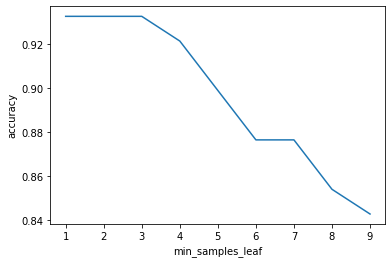

In [135]:
score_list = []  # we store the values we find in this list.
for each in range(1,10):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth= 4, min_samples_leaf= each)
    dt.fit(X_train,y_train)
    score_list.append(dt.score(X_test,y_test))
    print(f"Score for min_samples_leaf={each} : {dt.score(X_test,y_test)}")
    
# visualize
plt.plot(range(1,10),score_list)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show()

The accuracy comes down when min_samples_leaf > 3. We can choose apt min_samples_leaf as 

**Final Decision tree model with parameters max_depth = 4 and min_samples_leaf = 2**

In [159]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, min_samples_leaf=2)
model_entropy.fit(X_train, y_train)
model_entropy.score(X_test, y_test)

0.9325842696629213

The Accuracy score is **0.93**. This is an improvement compared to the base model

In [160]:
y_pred = model_entropy.predict(X_test)

In [161]:
pd.crosstab(y_test, y_pred)

col_0,0,1
status,,
0,47,4
1,2,36


In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        51
           1       0.90      0.95      0.92        38

    accuracy                           0.93        89
   macro avg       0.93      0.93      0.93        89
weighted avg       0.93      0.93      0.93        89



Observation:

After optimising the parameters max_depth = 4 and min_samples_leaf = 2, we could see that there is improvement in Precision, Recall and f1-score

Improvement in **Recall** score(less false negatives) is great deal to us because it helps us not to missout on the people with Parkinson's disease. Regularising the parameters helped us to achive this better model 

**8.Next implement the decision tree using Random Forest and find the accuracy**

In [163]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.9438202247191011

The Accuracy score for base Random Classifier model is **0.94**

In [164]:
y_pred = model_rf.predict(X_test)

In [165]:
pd.crosstab(y_test, y_pred)

col_0,0,1
status,,
0,49,2
1,3,35


In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.95      0.92      0.93        38

    accuracy                           0.94        89
   macro avg       0.94      0.94      0.94        89
weighted avg       0.94      0.94      0.94        89



**Calculating optimum value for n_estimator:**

Score for n_estimators=10 : 0.9438202247191011
Score for n_estimators=15 : 0.9325842696629213
Score for n_estimators=20 : 0.9438202247191011
Score for n_estimators=25 : 0.9438202247191011
Score for n_estimators=30 : 0.9438202247191011
Score for n_estimators=35 : 0.9550561797752809
Score for n_estimators=40 : 0.9325842696629213
Score for n_estimators=45 : 0.9438202247191011
Score for n_estimators=50 : 0.9325842696629213
Score for n_estimators=55 : 0.9325842696629213
Score for n_estimators=60 : 0.9550561797752809
Score for n_estimators=65 : 0.9550561797752809
Score for n_estimators=70 : 0.9325842696629213
Score for n_estimators=75 : 0.9325842696629213
Score for n_estimators=80 : 0.9438202247191011
Score for n_estimators=85 : 0.9438202247191011
Score for n_estimators=90 : 0.9438202247191011
Score for n_estimators=95 : 0.9550561797752809
Score for n_estimators=100 : 0.9662921348314607
Score for n_estimators=105 : 0.9213483146067416
Score for n_estimators=110 : 0.9550561797752809
Score for 

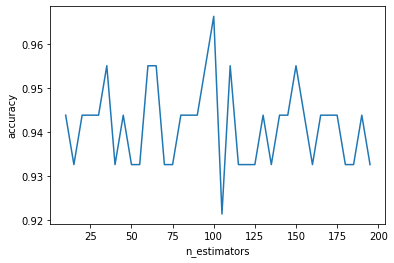

In [167]:
score_list = []  # we store the values we find in this list.
for each in range(10,200,5):
    rf = RandomForestClassifier(n_estimators=each)
    rf.fit(X_train,y_train)
    score_list.append(rf.score(X_test,y_test))
    print(f"Score for n_estimators={each} : {rf.score(X_test,y_test)}")
    
# visualize
plt.plot(range(10,200,5),score_list)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

The best accuracy is obtained at n-estimators = 100

**Final Random Forest model with n_estimators=100**

In [211]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.9662921348314607

In [212]:
y_pred = model_rf.predict(X_test)

In [213]:
pd.crosstab(y_test, y_pred)

col_0,0,1
status,,
0,50,1
1,2,36


In [214]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.97      0.95      0.96        38

    accuracy                           0.97        89
   macro avg       0.97      0.96      0.97        89
weighted avg       0.97      0.97      0.97        89



Observation:

After optimising the parameter n_estimators = 100  we could see that there is improvement in Precision, Recall and f1-score of the Random Forest Classifier


### Conclusion:

From the results, Random Forest Classifier is the better model. This is because precision, recall and f1-score of Random Forest is better than the Decision Tree clasifier. 

Also to note that although the false negatives are same in both the model, the RF classifer has done a better job in minimising the false positives 